In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from importnb import Notebook
with Notebook():
    from RFM_model import RFM
    from utility import Utility
    from data_preprocessing import Data

In [3]:
transaction_data = Data('transaction_data.csv')

In [4]:
transaction_data.clean_data()

Number of rows ignored 293092


In [5]:
transaction_data.get_data_info(transaction_data.data_cleaned)

------------------------------First Five rows:------------------------------
   UserId  TransactionId TransactionTime  ItemCode  \
0  278166        6355745      2019-02-02    465549   
1  337701        6283376      2018-12-26    482370   
2  267099        6385599      2019-02-15    490728   
3  380478        6044973      2018-06-22    459186   
5  285957        6307136      2019-01-11   1787247   

                     ItemDescription  NumberOfItemsPurchased  CostPerItem  \
0   FAMILY ALBUM WHITE PICTURE FRAME                       6        11.73   
1              LONDON BUS COFFEE MUG                       3         3.52   
2  SET 12 COLOUR PENCILS DOLLY GIRL                       72         0.90   
3        UNION JACK FLAG LUGGAGE TAG                       3         1.73   
5   CUT GLASS T-LIGHT HOLDER OCTAGON                      12         3.52   

          Country  TotalPrice  
0  United Kingdom       70.38  
1  United Kingdom       10.56  
2          France       64.80  
3  Unit

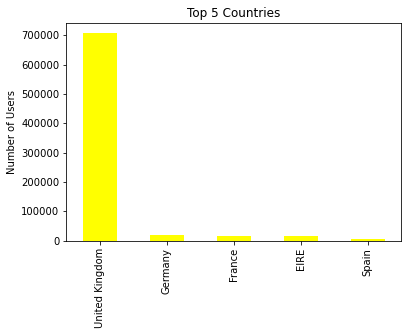

In [6]:
transaction_data.data_cleaned.Country.value_counts()[:5].plot(kind='bar',color='Yellow')
plt.title('Top 5 Countries')
plt.ylabel('Number of Users')
plt.show()

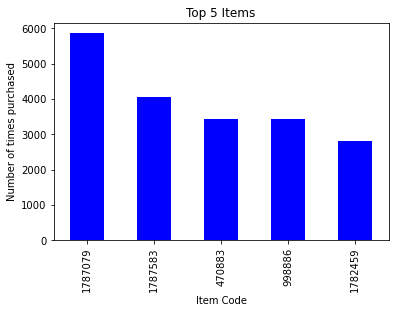

In [7]:
transaction_data.data_cleaned.ItemCode.value_counts()[:5].plot(kind='bar',color='Blue')
plt.title('Top 5 Items')
plt.ylabel('Number of times purchased')
plt.xlabel('Item Code')
plt.show()

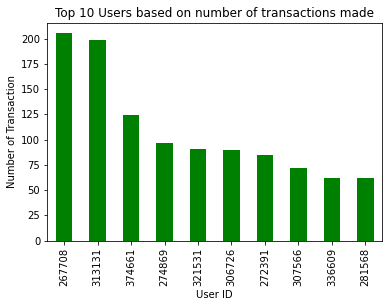

In [8]:
top_users = transaction_data.data_cleaned.groupby('UserId').agg({'TransactionId': lambda num: len(np.unique(num))})
top_users = top_users.sort_values('TransactionId',ascending=False)
top_users[:10].plot(kind='bar', color='Green',legend=None)
plt.title('Top 10 Users based on number of transactions made')
plt.ylabel('Number of Transaction')
plt.xlabel('User ID')
plt.show()

In [9]:
rfm_model = RFM()
rfm_model.get_rfm_values(transaction_data.data_cleaned)

        Recency  Frequency   Monetary
UserId                               
259266      806          2  641217.60
259287      483        302   29856.36
259308      556         54   11982.24
259329      499        144   12087.84
259350      791         32    2443.20


In [10]:
rfm_model.calculate_rfm_score()

        Recency  Frequency   Monetary  R  F  M  RFM
UserId                                             
259266      806          2  641217.60  4  4  1  441
259287      483        302   29856.36  1  1  1  111
259308      556         54   11982.24  3  3  2  332
259329      499        144   12087.84  2  2  2  222
259350      791         32    2443.20  4  4  4  444


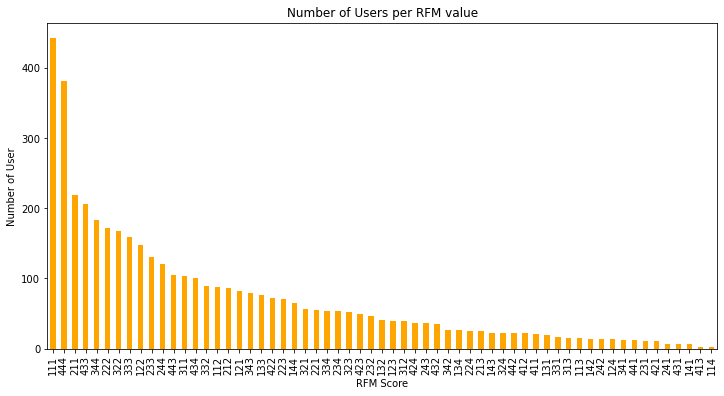

In [11]:
plt.figure(figsize=(12,6)) 
rfm_model.RFM['RFM'].value_counts()[:len(np.unique(rfm_model.RFM['RFM']))].plot(kind='bar', color='Orange')
plt.title('Number of Users per RFM value')
plt.ylabel('Number of User')
plt.xlabel('RFM Score')
plt.show()

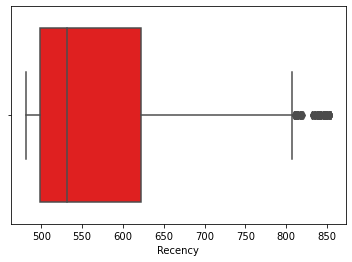

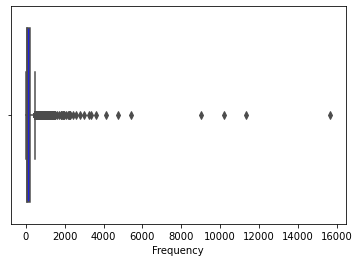

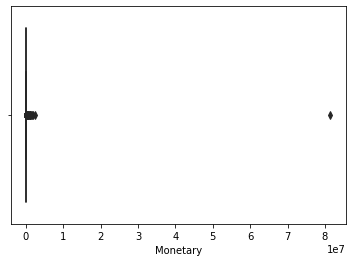

In [12]:
rfm_model.plot_boxplot(rfm_model.RFM,False)

In [13]:
rfm_model.remove_outliers()

Number of outliers removed  =  720


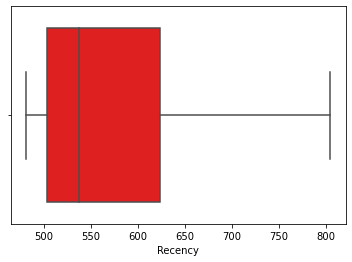

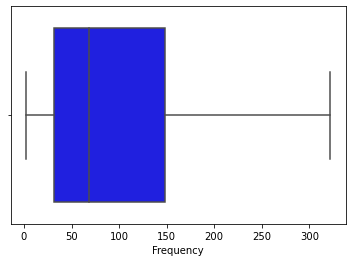

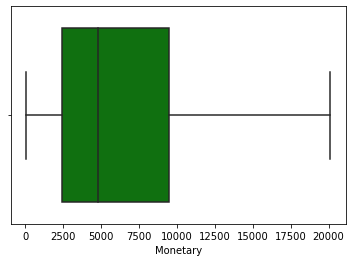

In [14]:
rfm_model.plot_boxplot(rfm_model.RFM_outlier_free,True)

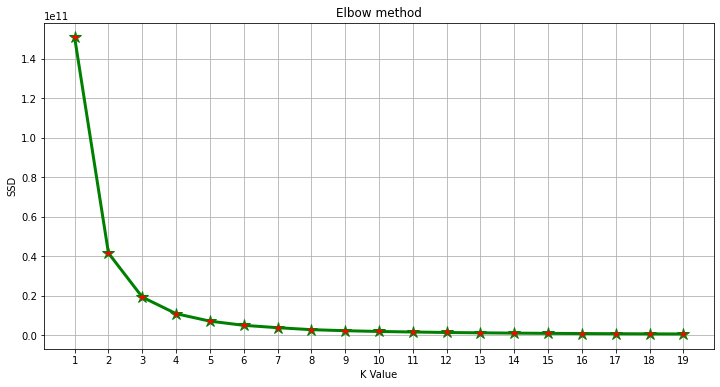

In [15]:
ssd = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(rfm_model.RFM_outlier_free[['Recency','Frequency','Monetary']])
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,20),ssd, linewidth=3, color="Green", marker ="*", markerfacecolor="Red", markerfacecoloralt="Red", markersize=12)
plt.xlabel("K Value")
plt.xticks(np.arange(1,20,1))
plt.ylabel("SSD")
plt.title('Elbow method')
plt.show()

In [16]:
k_m = KMeans(n_clusters=3)
clusters = k_m.fit_predict(rfm_model.RFM_outlier_free[['Recency','Frequency','Monetary']])
rfm_model.RFM_outlier_free["label"] = clusters
rfm_model.RFM_outlier_free.head(5)

,Recency,Frequency,Monetary,R,F,M,RFM,label
UserId,,,,,,,,
259287,483,302,29856.36,1,1,1,111,1
259308,556,54,11982.24,3,3,2,332,2
259329,499,144,12087.84,2,2,2,222,2
259350,791,32,2443.20,4,4,4,444,0
259392,517,154,11492.88,2,2,2,222,2


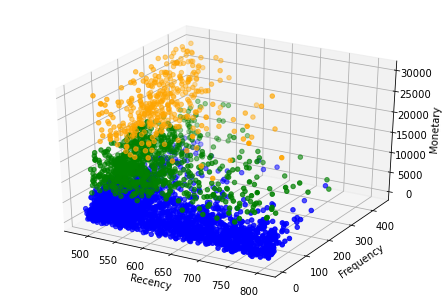

In [17]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(np.array(rfm_model.RFM_outlier_free.Recency[rfm_model.RFM_outlier_free.label == 0]), np.array(rfm_model.RFM_outlier_free.Frequency[rfm_model.RFM_outlier_free.label == 0]), np.array(rfm_model.RFM_outlier_free.Monetary[rfm_model.RFM_outlier_free.label == 0]), c='Blue')
ax.scatter(np.array(rfm_model.RFM_outlier_free.Recency[rfm_model.RFM_outlier_free.label == 1]), np.array(rfm_model.RFM_outlier_free.Frequency[rfm_model.RFM_outlier_free.label == 1]), np.array(rfm_model.RFM_outlier_free.Monetary[rfm_model.RFM_outlier_free.label == 1]), c='Orange')
ax.scatter(np.array(rfm_model.RFM_outlier_free.Recency[rfm_model.RFM_outlier_free.label == 2]), np.array(rfm_model.RFM_outlier_free.Frequency[rfm_model.RFM_outlier_free.label == 2]), np.array(rfm_model.RFM_outlier_free.Monetary[rfm_model.RFM_outlier_free.label == 2]), c='Green')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

In [22]:
output = pd.DataFrame()
output['UserId'] = list(rfm_model.RFM_outlier_free.index.values)
output['Cluster'] = list(rfm_model.RFM_outlier_free['label'])
output['Cluster'][(output['Cluster']==0)] = 'Blue'
output['Cluster'][(output['Cluster']==1)] = 'Orange'
output['Cluster'][(output['Cluster']==2)] = 'Green'

In [23]:
output.head(10)

,UserId,Cluster
0,259287,Orange
1,259308,Green
2,259329,Green
3,259350,Blue
4,259392,Green
5,259413,Blue
6,259434,Green
7,259455,Blue
8,259476,Orange
9,259518,Green
